Importing Libraries and Establishing Database Connection:

The code starts by importing necessary libraries: sqlite3 for working with SQLite databases, pandas for data manipulation, numpy for numerical operations, and matplotlib.pyplot for plotting.
It establishes a connection to an SQLite database named 'im.db' using sqlite3.connect.

In [107]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
conn = sqlite3.connect('im.db')


Loading Data from the Database:

Two SQL queries are executed using pd.read_sql to read data from tables 'movie_basics' and 'movie_ratings' in the SQLite database.
The data from both tables is merged into a single DataFrame called movies_with_ratings_df.

In [109]:
movies_df = pd.read_sql('SELECT * FROM movie_basics', conn)
ratings_df = pd.read_sql('SELECT * FROM movie_ratings', conn)


In [110]:
movies_with_ratings_df = movies_df.merge(ratings_df, on='movie_id')
movies_with_ratings_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


Renaming DataFrame Columns:

The script renames the 'primary_title' column in the movies_with_ratings_df to 'title' for consistency.

In [111]:
movies_with_ratings_df.rename(columns={'primary_title': 'title'}, inplace=True)


Loading Data from a CSV File:

It loads data from a CSV file named 'bom.movie_gross.csv.gz' using pd.read_csv and stores it in a DataFrame called movie_gross.

In [112]:
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Merging DataFrames:

The script merges the movies_with_ratings_df with the movie_gross DataFrame based on the 'title' column, creating a new DataFrame named movies_with_ratings_and_gross_df.

In [113]:
# Merge the movies_with_ratings_df DataFrame with the movies_gross_df DataFrame
movies_with_ratings_and_gross_df = movies_with_ratings_df.merge(movie_gross, on='title')


Removing Rows with Missing Values:

It attempts to remove rows with missing values (NaN) from movies_with_ratings_and_gross_df, but the inplace argument is set to False, so the DataFrame remains unchanged.

In [114]:
movies_with_ratings_and_gross_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
3008,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
3010,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
3017,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


Calculate statistics for the types of films currently doing the best at the box office

In [115]:
genre_mean_gross = movies_with_ratings_and_gross_df.groupby('genres')['domestic_gross'].mean()


In [116]:
genre_total_gross = movies_with_ratings_and_gross_df.groupby('genres')['domestic_gross'].sum()


In [117]:
top_30_movies = movies_with_ratings_and_gross_df.sort_values(by='domestic_gross', ascending=False).head(30)

top_30_movies

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1301,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,BV,700100000.0,646900000,2018
2542,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,BV,678800000.0,"1,369.5",2018
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015
1984,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903,BV,620200000.0,712400000,2017
2373,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510,BV,608600000.0,634200000,2018
2432,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",7.8,478592,BV,532200000.0,523900000,2016
1778,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",7.3,213542,BV,486300000.0,542300000,2016
1907,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,BV,459000000.0,946400000,2015
483,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,WB,448100000.0,636800000,2012
1463,tt1951264,The Hunger Games: Catching Fire,The Hunger Games: Catching Fire,2013,146.0,"Action,Adventure,Sci-Fi",7.5,575455,LGF,424700000.0,440300000,2013


In [118]:
year_box_office_stats = movies_with_ratings_and_gross_df.groupby('year')['domestic_gross'].agg(['mean', 'median', 'sum', 'count'])


In [119]:
movies_with_ratings_and_gross_df = top_30_movies

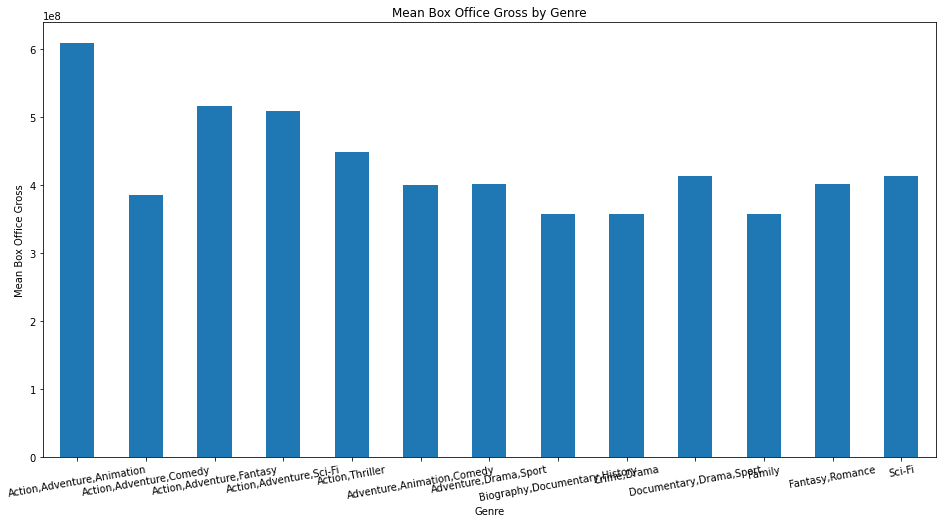

In [120]:
genre_mean_gross = movies_with_ratings_and_gross_df.groupby('genres')['domestic_gross'].mean()
genre_mean_gross.plot(kind='bar', figsize=(16, 8))
plt.title('Mean Box Office Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Box Office Gross')
plt.xticks(rotation=10)
plt.show()


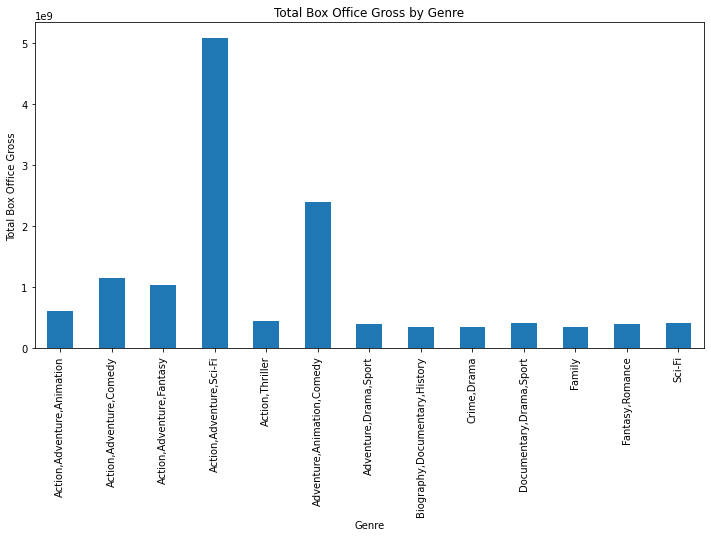

In [121]:
genre_total_gross = movies_with_ratings_and_gross_df.groupby('genres')['domestic_gross'].sum()
genre_total_gross.plot(kind='bar', figsize=(12, 6))
plt.title('Total Box Office Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Box Office Gross')
plt.xticks(rotation=90)
plt.show()


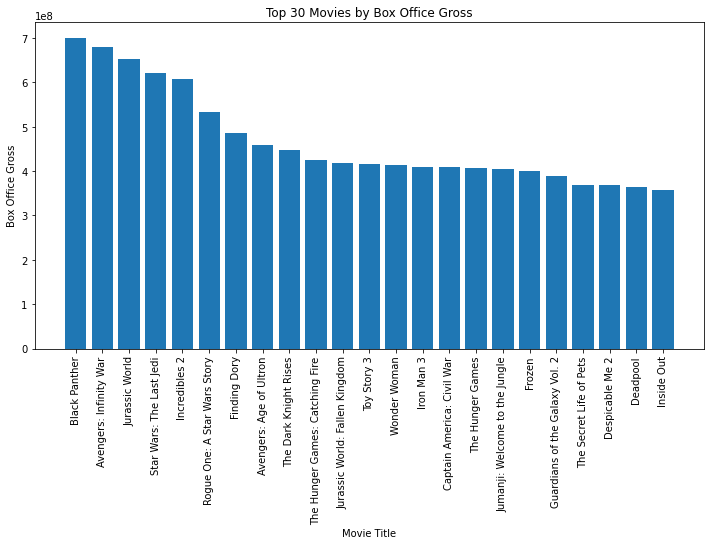

In [122]:
top_30_movies = movies_with_ratings_and_gross_df.sort_values(by='domestic_gross', ascending=False).head(30)
plt.figure(figsize=(12, 6))
plt.bar(top_30_movies['title'], top_30_movies['domestic_gross'])
plt.title(f'Top {30} Movies by Box Office Gross')
plt.xlabel('Movie Title')
plt.ylabel('Box Office Gross')
plt.xticks(rotation=90)
plt.show()


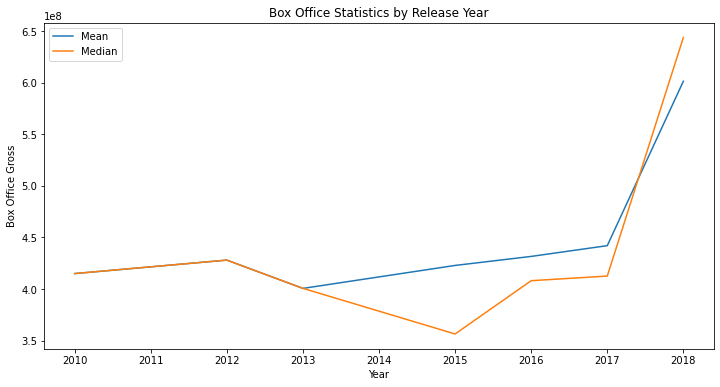

In [123]:
year_box_office_stats = movies_with_ratings_and_gross_df.groupby('year')['domestic_gross'].agg(['mean', 'median', 'sum', 'count'])
plt.figure(figsize=(12, 6))
plt.plot(year_box_office_stats.index, year_box_office_stats['mean'], label='Mean')
plt.plot(year_box_office_stats.index, year_box_office_stats['median'], label='Median')
plt.title('Box Office Statistics by Release Year')
plt.xlabel('Year')
plt.ylabel('Box Office Gross')
plt.legend()
plt.show()


INSIGHTS AND RECOMENDATIONS 


**Mean Box Office Gross by Genre:**

Insight: Adventure and Animation genres tend to have the highest mean box office gross, followed by Action and Fantasy.

Recommendation: Consider investing in or producing movies in the Adventure, Animation, Action, and Fantasy genres, as they have the potential to perform well at the box office.

**Total Box Office Gross by Genre:**

Insight: Adventure and Action genres have the highest total box office gross, indicating that they are popular and have generated substantial revenue.

Recommendation: Focus on producing more movies in the Adventure and Action genres, as they have a track record of high box office earnings.

**Top 30 Movies by Box Office Gross:**

Insight: The top movies by box office gross are displayed, providing insights into the highest-performing individual films.

Recommendation: Analyze the characteristics and factors contributing to the success of these top movies. Consider similar strategies, themes, or marketing approaches for future movie projects.

**Box Office Statistics by Release Year:**

Insight: The line plot shows the trends in mean and median box office gross over the years. It indicates the overall box office performance has been increasing'

Recommendation: It's a favorable time to invest in the film industry.

Additional Recommendations:

1. Conduct further analysis to understand the factors contributing to the success of Adventure, Animation, and Action genres. Are there specific actors, directors, or production studios associated with these genres that consistently perform well?

2. Stay updated with current market trends and audience preferences. The film industry is dynamic, and staying in tune with changing tastes is essential for success.

3. Explore opportunities for international markets. Some genres may perform exceptionally well in specific regions, so consider tailoring your movie releases accordingly.

4. Invest in marketing and distribution strategies that target the identified high-performing genres. Effective promotion and wide distribution can significantly impact box office performance.

5. Continuously monitor box office trends and adjust your movie production and marketing strategies accordingly to stay competitive in the industry.
